In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
def preprocessing(df):
    df = df.drop('id', axis=1)
    df['diagnosis'] = df['diagnosis'].replace({'M':1.0, 'B':0.0})
    
    # null value preprocessing
    df = df.dropna(axis=1, thresh=200) # null값이 200이상인 column 제거
    df = df.fillna(df.mean(axis=0)) # null 값은 해당열의 평균으로 치환
    
    # 중복 데이터 제거
    df = df.drop_duplicates()
    
    # dtype: object->float64
    special_characters = ['!','@','#','$','%','^','&','*','(',')','-','=',"'",'"',';',':','<','>',',','?','/']

    columns = list(df.columns)

    for column in columns:
        if df[column].dtype == 'object':
            for special in special_characters:
                df[column] = df[column].str.replace(special, '')
            df[column] = df[column].astype('float64')
            
    # min-max Normalization
    df = (df - df.min(axis=0))/(df.max(axis=0) - df.min(axis=0))
            
    # 상관관계 분석
    df_corr = df.corr(method='pearson')
    
    # 상관관계 시각화
    fig, ax = plt.subplots(figsize=(50, 50))
    ax = sns.heatmap(df_corr, 
                    linewidths = 0.1, vmax=1.0,
                   square=True, cmap=plt.cm.PuBu,
                   linecolor='white', annot=True, annot_kws={'size':20})
    ax.tick_params(labelsize=30)
    
    #상관관계 약햔 feature 제거
    weak_corr_list = list(df_corr[abs(df_corr['diagnosis']) <= 0.4].index)
    df = df.drop(weak_corr_list, axis=1)
    
    # 상관관계 순위 DataFrame 만들기
    new_df_corr = df.corr(method='pearson')
    diagnosis_corr = new_df_corr['diagnosis']
    diagnosis_corr_sort = abs(diagnosis_corr.drop('diagnosis')).sort_values(ascending=False)
    
    sort_columns = list(diagnosis_corr_sort.index)
    
    sort_values = []
    for column in sort_columns:
        sort_values.append(diagnosis_corr[column])
    
    rank = list(range(1, len(sort_columns)+1))
    rank_df = pd.DataFrame({'rank': rank,
                            'columns':sort_columns,
                            'vlaues':sort_values}).set_index('rank')
    
    return df, rank_df

In [3]:
df = pd.read_csv('Breast Cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


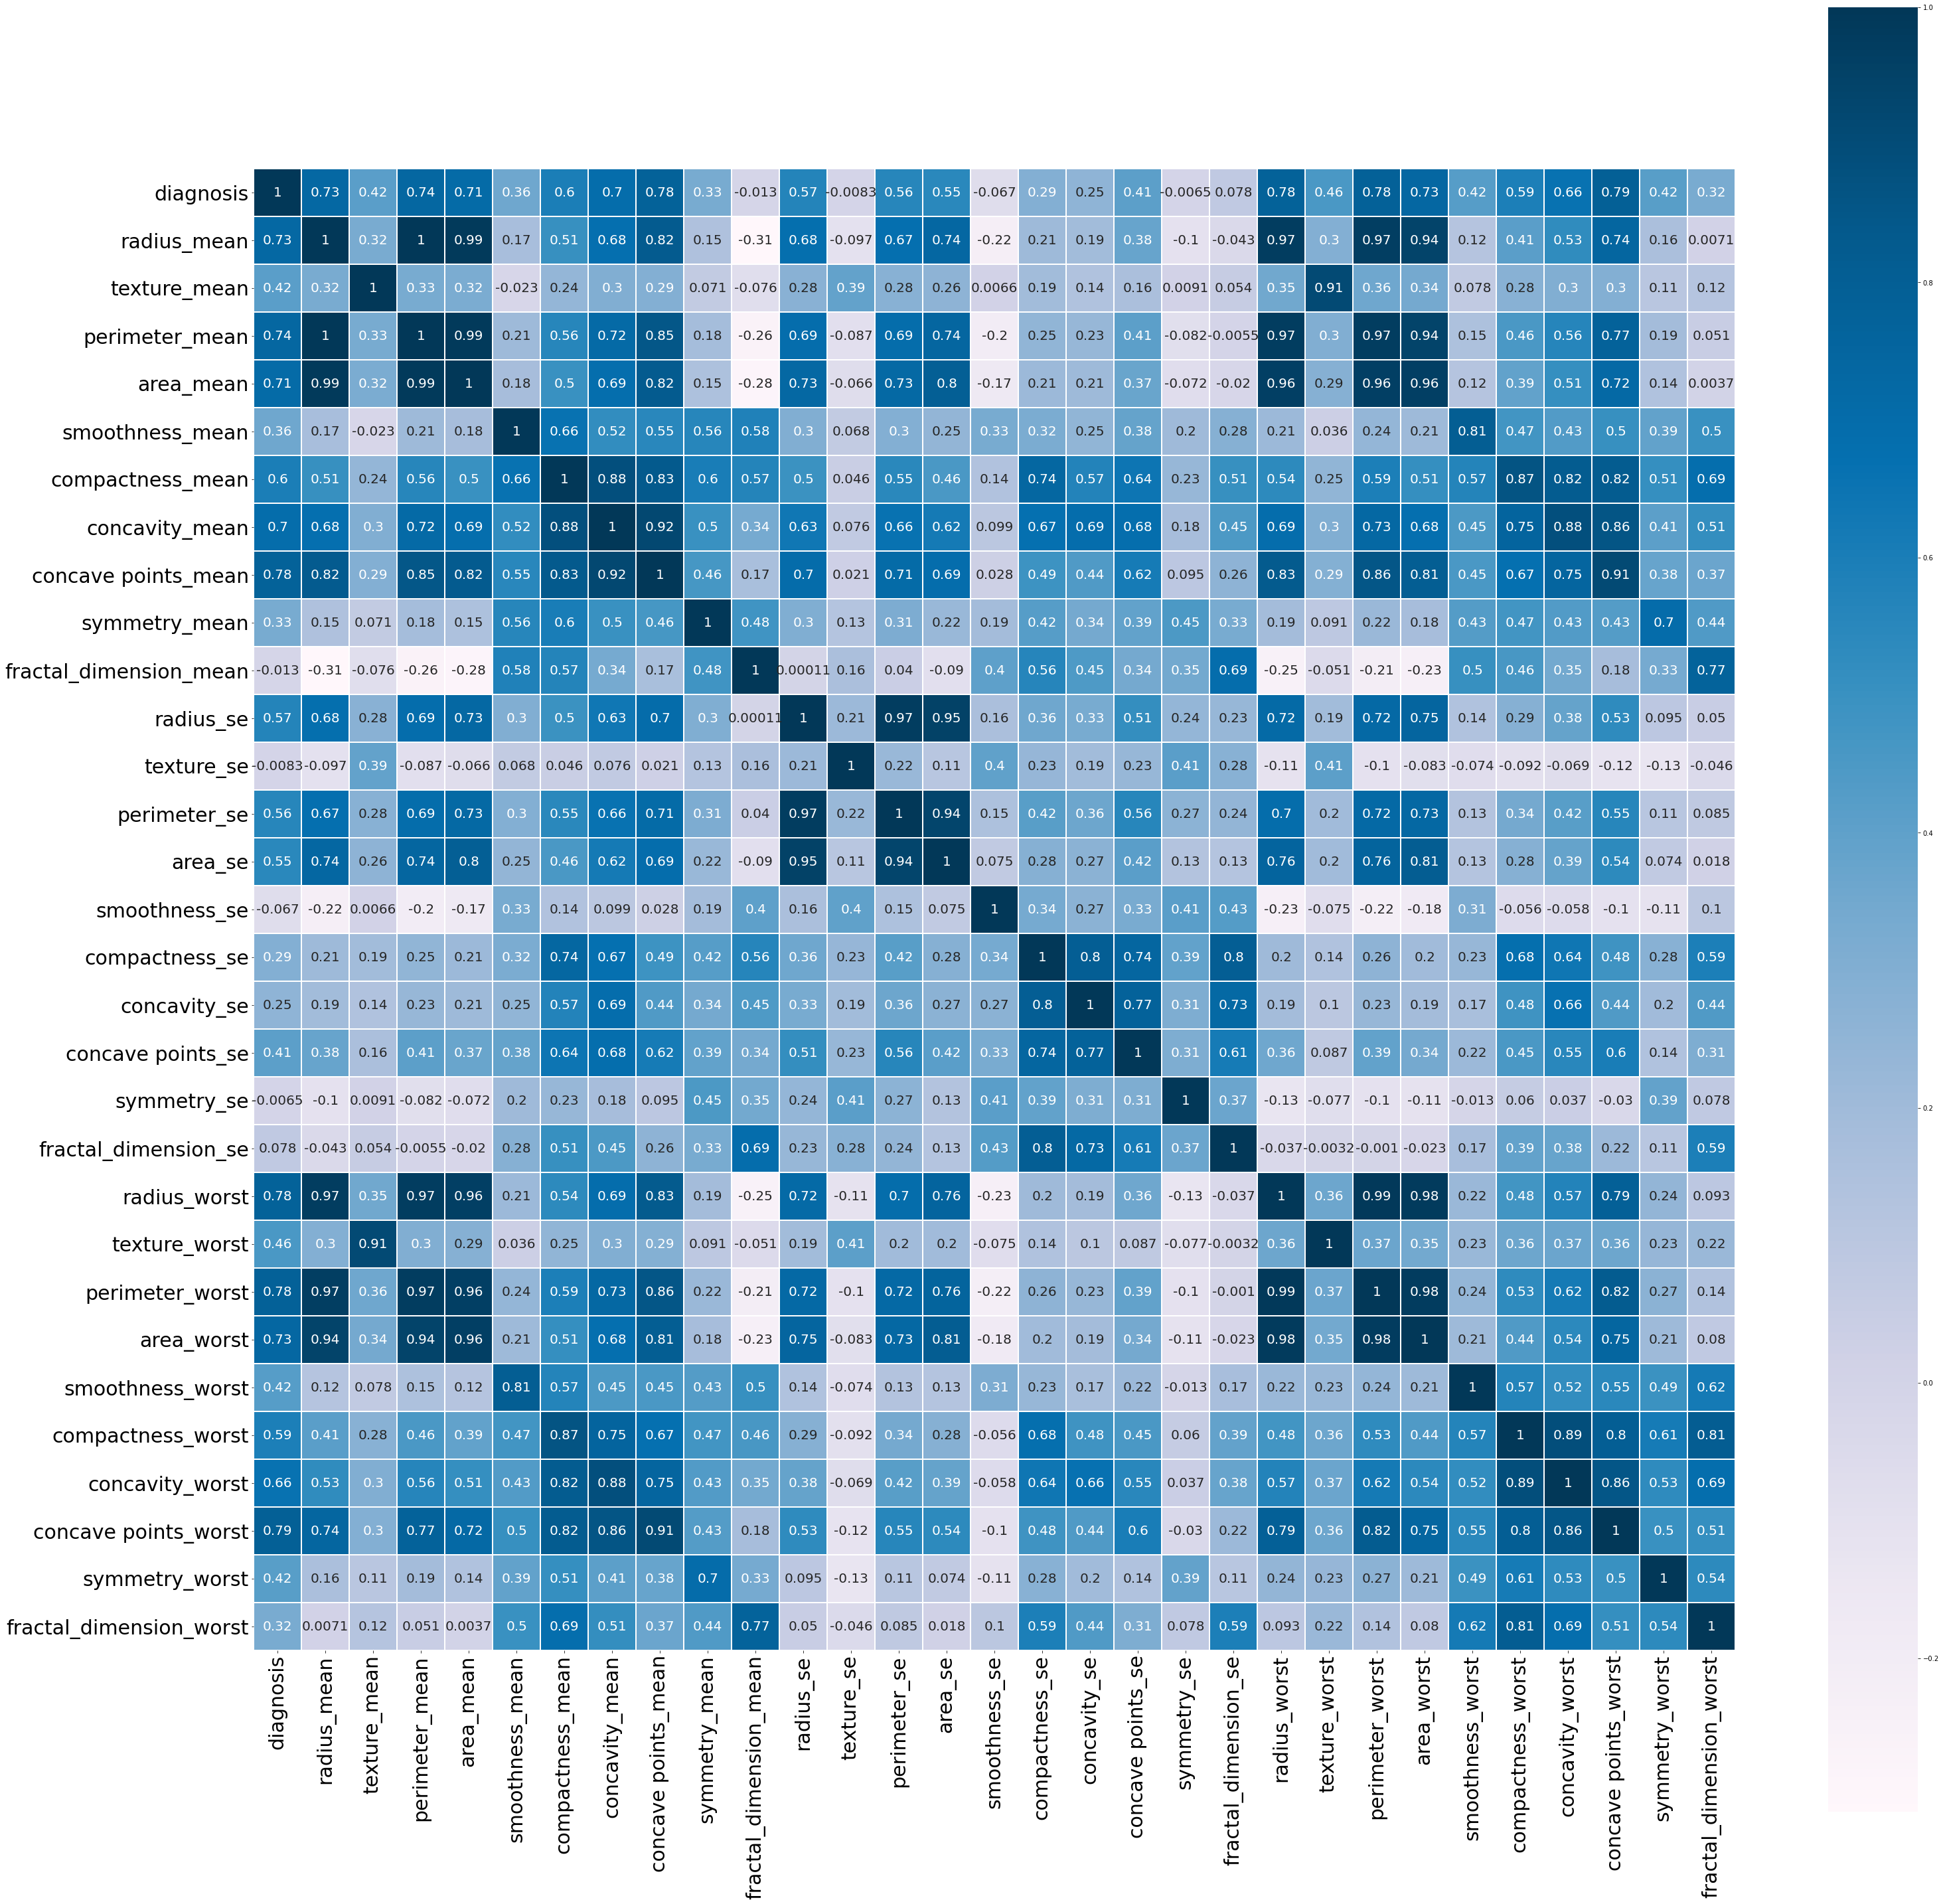

In [4]:
new_df, rank_df = preprocessing(df)

In [5]:
new_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.792037,0.703140,0.731113,0.356147,0.369034,...,0.300625,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462
1,1.0,0.643144,0.272574,0.615783,0.501591,0.181768,0.203608,0.348757,0.156437,0.124440,...,0.253836,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590
2,1.0,0.601496,0.390260,0.595743,0.449417,0.431017,0.462512,0.635686,0.229622,0.180370,...,0.389847,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811361,0.565604,0.522863,0.139091,0.126655,...,0.353665,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000
4,1.0,0.629893,0.156578,0.630986,0.489290,0.347893,0.463918,0.518390,0.233822,0.220563,...,0.357075,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.690000,0.428813,0.678668,0.566490,0.296055,0.571462,0.690358,0.385479,0.325873,...,0.464861,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575
565,1.0,0.622320,0.626987,0.604036,0.474019,0.257714,0.337395,0.486630,0.236828,0.209490,...,0.317863,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502
566,1.0,0.455251,0.621238,0.445788,0.303118,0.254340,0.216753,0.263519,0.124896,0.125713,...,0.294942,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721
567,1.0,0.644564,0.663510,0.665538,0.475716,0.790197,0.823336,0.755467,0.222524,0.236300,...,0.315211,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142


In [6]:
rank_df

,columns,vlaues
rank,,
1,concave points_worst,0.793566
2,perimeter_worst,0.782914
3,concave points_mean,0.776614
4,radius_worst,0.776454
5,perimeter_mean,0.742636
6,area_worst,0.733825
7,radius_mean,0.730029
8,area_mean,0.708984
9,concavity_mean,0.696360
